In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [2]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.shape

(129880, 24)

In [4]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
#Replacing all spaces and - with underscores
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')

In [6]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check_in_Service', 'Online_Boarding', 'Gate_Location',
       'On_board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service',
       'In_flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [7]:
df = df[df['Arrival_Delay'].notna()]

In [8]:
#drop the ID column
df = df.drop('ID', axis=1)

In [9]:
df.isna().sum()

Gender                                    0
Age                                       0
Customer_Type                             0
Type_of_Travel                            0
Class                                     0
Flight_Distance                           0
Departure_Delay                           0
Arrival_Delay                             0
Departure_and_Arrival_Time_Convenience    0
Ease_of_Online_Booking                    0
Check_in_Service                          0
Online_Boarding                           0
Gate_Location                             0
On_board_Service                          0
Seat_Comfort                              0
Leg_Room_Service                          0
Cleanliness                               0
Food_and_Drink                            0
In_flight_Service                         0
In_flight_Wifi_Service                    0
In_flight_Entertainment                   0
Baggage_Handling                          0
Satisfaction                    

In [10]:
df.shape

(129487, 23)

In [11]:
#convert satisfaction to numbers
#gender
#customer type
#type of travel
#class
sat = {'Neutral or Dissatisfied': 0, 'Satisfied': 1}
df.loc[:,'Satisfaction'] = df['Satisfaction'].map(sat)

gd = {'Female':0, 'Male':1}
df.loc[:,'Gender'] = df['Gender'].map(gd)

ct = {'First-time':0, 'Returning':1}
df.loc[:,'Customer_Type'] = df['Customer_Type'].map(ct)

tt = {'Business':0, 'Personal':1}
df.loc[:,'Type_of_Travel'] = df['Type_of_Travel'].map(tt)

cl = {'Business':0, 'Economy Plus': 1, 'Economy' : 2}
df.loc[:,'Class'] = df['Class'].map(cl)


In [12]:
df['Satisfaction'] = df['Satisfaction'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')
df['Customer_Type'] = df['Customer_Type'].astype('int64')
df['Type_of_Travel'] = df['Type_of_Travel'].astype('int64')
df['Class'] = df['Class'].astype('int64')

In [13]:
df.dtypes

Gender                                      int64
Age                                         int64
Customer_Type                               int64
Type_of_Travel                              int64
Class                                       int64
Flight_Distance                             int64
Departure_Delay                             int64
Arrival_Delay                             float64
Departure_and_Arrival_Time_Convenience      int64
Ease_of_Online_Booking                      int64
Check_in_Service                            int64
Online_Boarding                             int64
Gate_Location                               int64
On_board_Service                            int64
Seat_Comfort                                int64
Leg_Room_Service                            int64
Cleanliness                                 int64
Food_and_Drink                              int64
In_flight_Service                           int64
In_flight_Wifi_Service                      int64


In [14]:
df.head()

,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,Check_in_Service,Online_Boarding,Gate_Location,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1


In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Satisfaction'], random_state=88)
df_train.shape, df_test.shape

((90640, 23), (38847, 23))

In [16]:
#Applying logistic regression

import statsmodels.formula.api as smf

logreg = smf.logit(formula = 'Satisfaction ~ Gender + Age + Customer_Type + Type_of_Travel + Class + Flight_Distance + Departure_Delay + Arrival_Delay + Departure_and_Arrival_Time_Convenience + Ease_of_Online_Booking + Check_in_Service + Online_Boarding + Gate_Location + On_board_Service + Seat_Comfort + Leg_Room_Service + Cleanliness + Food_and_Drink + In_flight_Service + In_flight_Wifi_Service + In_flight_Entertainment + Baggage_Handling',
                   data = df_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.335322
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                90640
Model:                          Logit   Df Residuals:                    90617
Method:                           MLE   Df Model:                           22
Date:                Thu, 09 May 2024   Pseudo R-squ.:                  0.5102
Time:                        18:55:31   Log-Likelihood:                -30394.
converged:                       True   LL-Null:                       -62047.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -7.8654   

In [17]:
y_test = df_test['Satisfaction']

y_prob = logreg.predict(df_test)


In [18]:
y_prob

111317    0.820773
59704     0.079164
72095     0.003572
1740      0.002880
94455     0.156858
            ...   
6898      0.108994
92115     0.020110
104965    0.914061
76309     0.904300
92639     0.056325
Length: 38847, dtype: float64

In [19]:
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

In [20]:
y_pred

111317    1
59704     0
72095     0
1740      0
94455     0
         ..
6898      0
92115     0
104965    1
76309     1
92639     0
Length: 38847, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm.ravel())

Confusion Matrix : 
 [19832  2136  2790 14089]


In [22]:
TN, FP, FN, TP = cm.ravel()

In [23]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Accuracy: 0.8731948413004865


In [24]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): 0.8347058475028142
False Positive Rate (FPR): 0.09723233794610342


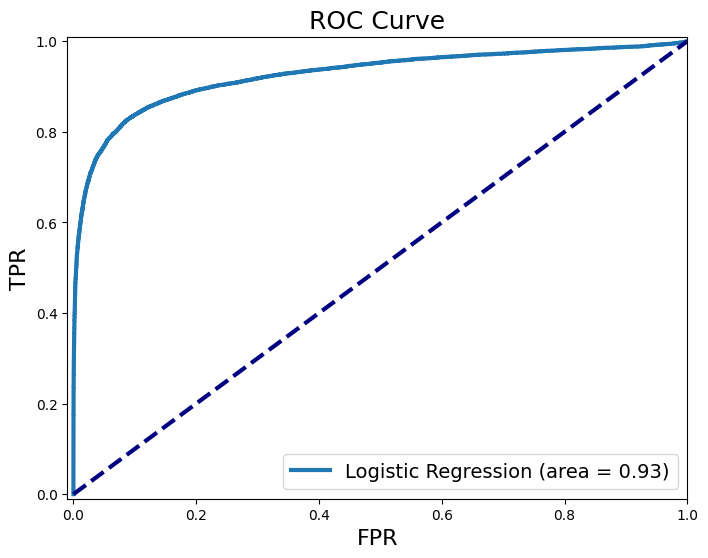

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [26]:
#Decision Tree Classifier

In [27]:
from sklearn.model_selection import train_test_split

y = df['Satisfaction']
X = df.drop('Satisfaction', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=df['Satisfaction'],
                                                    random_state=88)
X_train.shape, X_test.shape

((90640, 22), (38847, 22))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer
tree = DecisionTreeClassifier(random_state=88)
# Define the parameter grid
param_grid = {'max_depth': range(1, 11)}  # Explore depths from 1 to 10
# Define the scoring function
scorer = make_scorer(roc_auc_score, needs_proba=True)
# Setup the GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
# Best depth found
best_depth = grid_search.best_params_['max_depth']
print("Best depth:", best_depth)
print("Best cross-validation AUC:", grid_search.best_score_)
# Best model
best_tree = grid_search.best_estimator_

Best depth: 10
Best cross-validation AUC: 0.9857209012944796


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = best_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Accuracy:',accuracy_score(y_test, y_pred))
# Extracting TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculating TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print('True Positive Rate (TPR):', TPR)
print('False Positive Rate (FPR):', FPR)


Confusion Matrix : 
 [[21182   786]
 [ 1378 15501]]
Accuracy: 0.9442942826987927
True Positive Rate (TPR): 0.9183600924225369
False Positive Rate (FPR): 0.03577931536780772


In [30]:
from sklearn.metrics import roc_auc_score
train_probs = best_tree.predict_proba(X_train)[:, 1]
train_auc = (roc_auc_score(y_train, train_probs))
test_probs = best_tree.predict_proba(X_test)[:, 1]
test_auc = (roc_auc_score(y_test, test_probs))

In [31]:
print(train_auc)
print(test_auc)

0.9906057437524829
0.9854037835470643


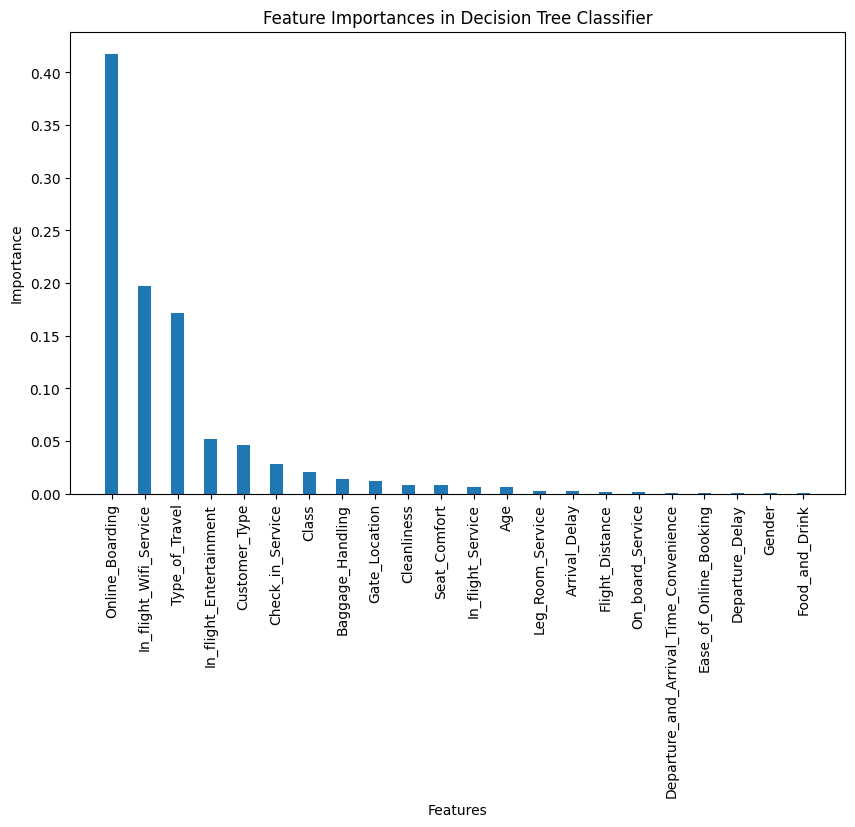

In [32]:
importances = pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
plt.bar(importances.index, importances['Importance'],  width = 0.4)
# Setting up the plot
plt.title('Feature Importances in Decision Tree Classifier')  # Adding a title
plt.xlabel('Features')   # Labeling the x-axis
plt.ylabel('Importance') # Labeling the y-axis
plt.xticks(rotation=90)
plt.show()

In [33]:
#Applying Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [3],
               'n_estimators': [5],
               'random_state': [88]}

tic = time.time() #This is to time the model

rf2 = RandomForestClassifier(random_state = 88)
scorer = make_scorer(roc_auc_score, needs_proba=True)
rf_cv = GridSearchCV(estimator=rf2, param_grid=grid_values, scoring=scorer, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time() #This is to time the model
print('time:', round(toc-tic, 2),'s')#This is to time the model

time: 82.51 s


In [36]:
print(rf_cv.best_params_)

{'max_features': 13, 'min_samples_leaf': 3, 'n_estimators': 5, 'random_state': 88}


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

rft = rf_cv.best_estimator_

y_pred = rft.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print('Accuracy:',accuracy_score(y_test, y_pred))
# Extracting TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculating TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print('True Positive Rate (TPR):', TPR)
print('False Positive Rate (FPR):', FPR)

Confusion Matrix : 
 [[21317   651]
 [ 1033 15846]]
Accuracy: 0.9566504491981362
True Positive Rate (TPR): 0.9387996919248771
False Positive Rate (FPR): 0.02963401310997815


In [38]:
from sklearn.metrics import roc_auc_score
train_probs = rft.predict_proba(X_train)[:, 1]
train_auc = (roc_auc_score(y_train, train_probs))
test_probs = rft.predict_proba(X_test)[:, 1]
test_auc = (roc_auc_score(y_test, test_probs))

In [39]:
print(train_auc)
print(test_auc)

0.999151187556579
0.9898753032757427


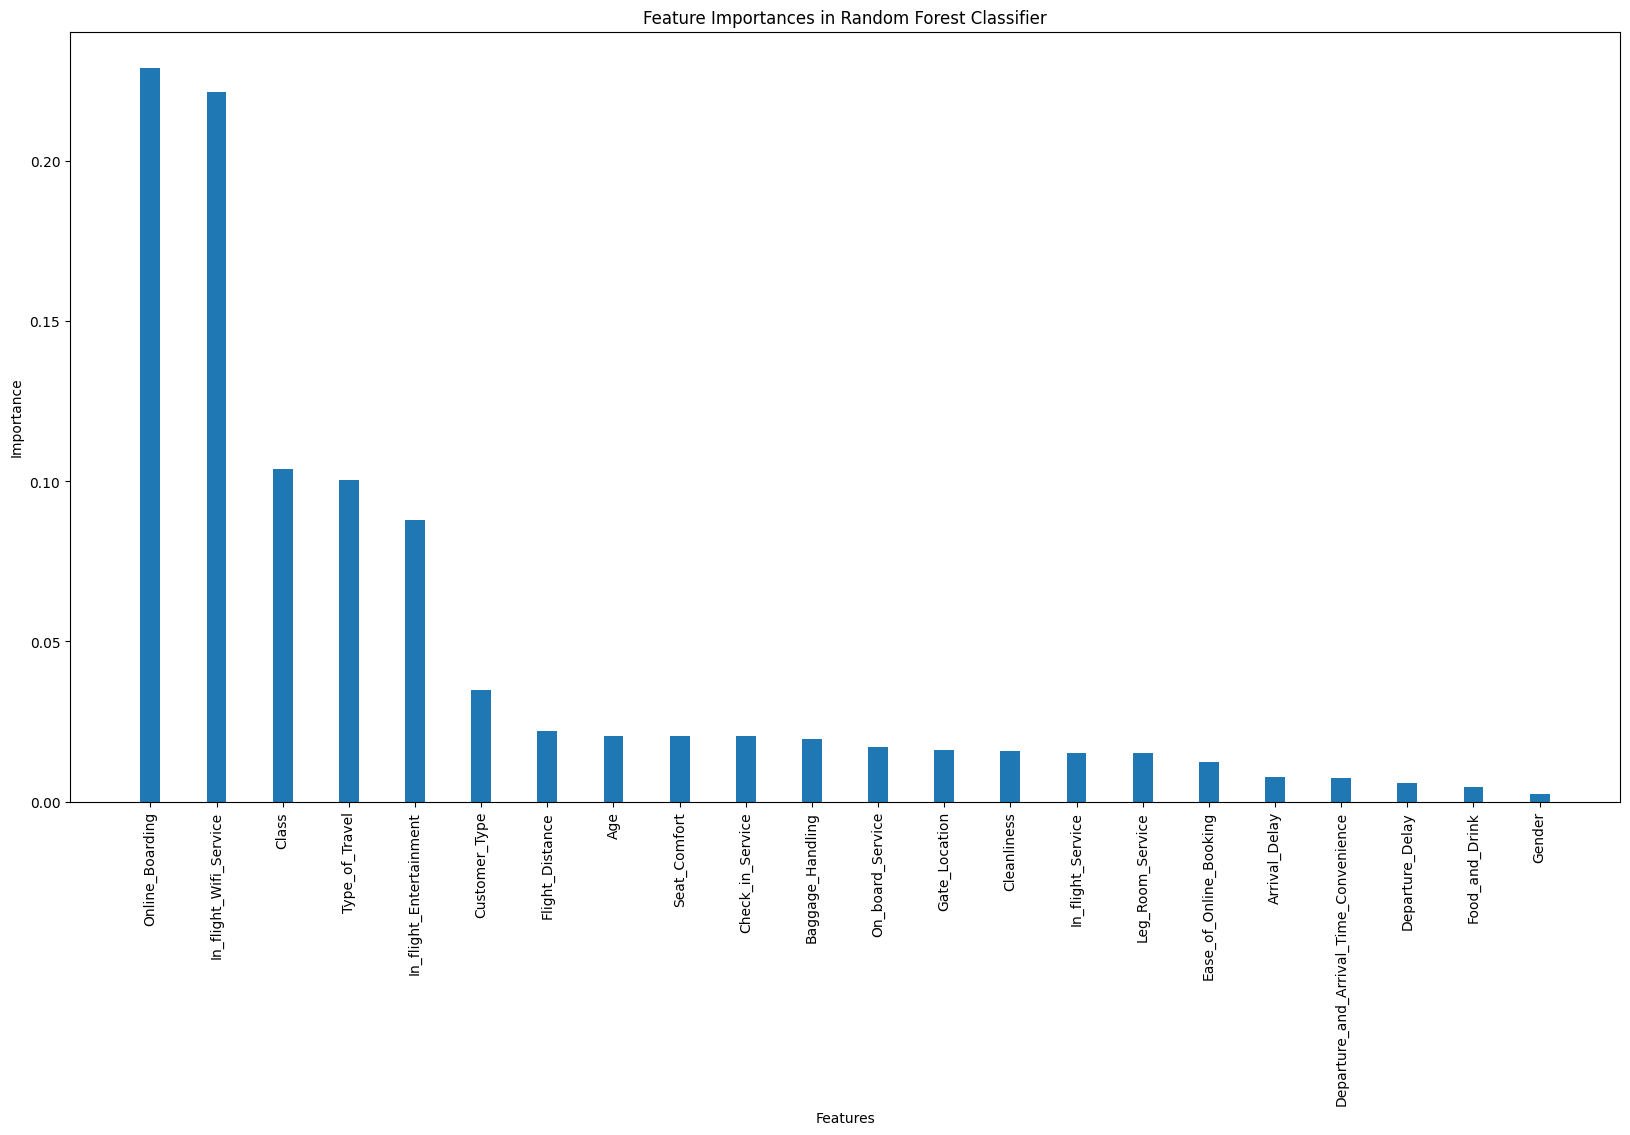

In [40]:
import seaborn as sns
importances = pd.DataFrame(rft.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(20,10))
plt.bar(importances.index, importances['Importance'],  width = 0.3)
# Setting up the plot
plt.title('Feature Importances in Random Forest Classifier')  # Adding a title
plt.xlabel('Features')   # Labeling the x-axis
plt.ylabel('Importance') # Labeling the y-axis
plt.xticks(rotation=90)
plt.show()